<a href="https://colab.research.google.com/github/jung-youjin/dip-pillow/blob/main/colab/FinalCode_copyfrom1772042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15054, done.
remote: Total 15054 (delta 0), reused 0 (delta 0), pack-reused 15054
Receiving objects: 100% (15054/15054), 13.43 MiB | 18.44 MiB/s, done.
Resolving deltas: 100% (10234/10234), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

'Colab Notebooks'   MyDrive   yolov4


In [8]:
#!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/testImg/testImg3.jpg -thresh 0.3#

# **crop & save**

In [9]:
%cd /content/
!git clone https://github.com/jung-youjin/yolov4-custom-functions.git

/content
Cloning into 'yolov4-custom-functions'...
remote: Enumerating objects: 241, done.
remote: Total 241 (delta 0), reused 0 (delta 0), pack-reused 241
Receiving objects: 100% (241/241), 62.01 MiB | 34.68 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [10]:
%cd yolov4-custom-functions/

/content/yolov4-custom-functions


In [11]:
# TensorFlow GPU
!pip install -r requirements-gpu.txt

     |████████████████████████████████| 320.4MB 49kB/s 
     |████████████████████████████████| 28.7MB 114kB/s 
     |████████████████████████████████| 2.9MB 35.8MB/s 
     |████████████████████████████████| 3.0MB 32.6MB/s 
     |████████████████████████████████| 460kB 47.0MB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=82d7209346986bdef516a8e5c24d5f4583123e84147a20912c167772b54514b6
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorbo

In [12]:
%cd /content

/content


In [13]:
# weight를 /yolov4-custom-functions/data 에 불러오기
!cp /mydrive/yolov4/backup/yolov4-obj_last.weights ./yolov4-custom-functions/data

In [14]:
# weight를 /yolov4-custom-functions/data 에 불러오기 -- best
!cp /mydrive/yolov4/backup/yolov4-obj_best.weights ./yolov4-custom-functions/data

In [15]:
# crop할 이미지 data에 불러오기
!cp /mydrive/yolov4/testImg/testImg222.png ./yolov4-custom-functions/data/images

In [16]:
%cd /content/yolov4-custom-functions/data/classes

/content/yolov4-custom-functions/data/classes


In [17]:
!rm coco.names

In [18]:
%cd /content

/content


In [19]:
!cp /mydrive/yolov4/obj.names /content/yolov4-custom-functions/data/classes/coco.names

In [20]:
%cd /content/yolov4-custom-functions

/content/yolov4-custom-functions


In [21]:
# 여기부터 에러남
# yolov4-custom-functions/data/classes에 있는 coco.names 삭제하고 우리 obj.names를 coco.names로 바꿔서 해결.

!python save_model.py --weights ./data/yolov4-obj_last.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 

2021-05-28 17:30:23.738829: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-28 17:30:24.942925: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-28 17:30:25.003775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-28 17:30:25.004352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-28 17:30:25.004388: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-28 17:30:25.240918: I tensorflow/stream_executor/platform/default

In [22]:
# 여기부터 에러남
# yolov4-custom-functions/data/classes에 있는 coco.names 삭제하고 우리 obj.names를 coco.names로 바꿔서 해결.

!python save_model.py --weights ./data/yolov4-obj_best.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 

2021-05-28 17:31:26.370471: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-28 17:31:27.516326: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-28 17:31:27.543615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-28 17:31:27.544191: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-28 17:31:27.544227: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-28 17:31:27.549327: I tensorflow/stream_executor/platform/default

In [23]:
# testImg25에 크롭할 이미지 이름 넣기
!python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/testImg222.png --crop

# **Octave (MATLAB 코드 연동)**

In [24]:
# # /content/yolov4-custom-functions 경로에서 시작
# # python으로 matlab code 실행하고 읽게 해주는 패키지 - octave 설치
# !apt install octave
# !apt install octave-image
# !apt install liboctave-dev

# # octave prompt 입장 용 명령어 입력
# !octave
# # octave prmpt 입장시, 사용자가 임의로 추가 pkg 설치를 위해 input 해주어야함
# # > pkg load image
# # > pkg install -forge control
# # > pkg load control
# # > pkg list 
# # > exit
# # pkg list 명령어로 두가지 패키지 설치 완료되었는지 확인

In [25]:
# # 공유문서함에 저장해둔 filterforocr.m 코드 colab VM에 복사 (새로 생성된 matlab폴더로)
# !mkdir matlab
# !cp /mydrive/yolov4/filterforocr222.m ./matlab

In [26]:
# # filterforocr222.m matlab code 실행 
# # yolo로 crop된 이미지들 gray scale + histeq된 이미지 /content/yolov4-custom-functions에 자동 저장

# !octave -W ./matlab/filterforocr222.m

/content/yolov4-custom-functions
mkdir: cannot create directory ‘/content/opencv-testImg222’: File exists
3 ['pill_2.png', 'ocr', 'pill_1.png']


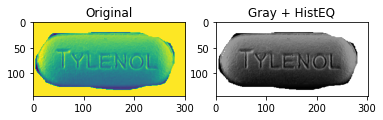

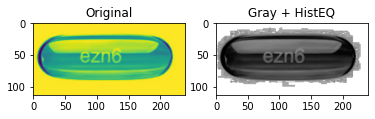

mkdir: cannot create directory ‘/content/opencv-testImg222/ocr’: File exists


In [40]:
%cd /content/yolov4-custom-functions/
!mkdir /content/opencv-testImg222
!cp -r /content/yolov4-custom-functions/detections/crop/testImg222/*.png /content/opencv-testImg222

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = '/content/opencv-testImg222'
file_list = os.listdir('/content/opencv-testImg222/')
print(len(file_list), file_list)

for i in range(1,len(file_list)):
  img = cv2.imread('detections/crop/testImg222/pill_%s.png' %i, cv2.IMREAD_GRAYSCALE)
  img_enhanced = cv2.equalizeHist(img)
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.subplot(122),plt.imshow(img_enhanced, cmap='gray'),plt.title('Gray + HistEQ')
  plt.show()

  save = plt.imsave('pill_%s_histeq.png' %i, img_enhanced, cmap='gray')

!mkdir /content/opencv-testImg222/ocr
!cp -r /content/yolov4-custom-functions/*.png /content/opencv-testImg222/ocr

# **EasyOCR**

In [28]:
# # testImg25에 위에 크롭한 이미지 이름 넣기
# # !cp -r /content/yolov4-custom-functions/detections/crop/testImg222 /content
# !mkdir /content/testImg222
# !cp ./*.png /content/testImg222 # yolov4-custom-functions에 들어있는 전처리끝난 모든 png이미지를 /content/testImg222에 복사해줌...

In [29]:
!pip install easyocr --no-deps # Colab already has all dependencies
!pip install python-bidi

     |████████████████████████████████| 63.2MB 48kB/s 


In [30]:
# 경로변경
# testImg25에 위에 크롭한 이미지 이름 넣기
%cd /content/testImg222/

[Errno 2] No such file or directory: '/content/testImg222/'
/content/yolov4-custom-functions


In [31]:
!ls

checkpoints	   data				README.md
conda-cpu.yml	   detections			requirements-gpu.txt
conda-gpu.yml	   detect.py			requirements.txt
convert_tflite.py  detect_video.py		save_model.py
convert_trt.py	   LICENSE
core		   license_plate_recognizer.py


In [32]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

In [33]:
# # Doing OCR. Get bounding boxes.
# import os
# from google.colab.patches import cv2_imshow
# import cv2
# import numpy as np

# import matplotlib.image as mpimg
# from PIL import Image

# path = '/content/testImg222/'
# file_list = os.listdir('/content/testImg222/')
# print(len(file_list), file_list)

# f = open("/content/input.txt", 'w')
# f = open("/content/input.txt", 'a')
# for i in range(1,len(file_list)):
#   print(i)
#   filename = "pill_%s_histeq.png" % i
#   bounds = reader.readtext(filename)
#   for j in range(0,len(bounds)):
#     data = bounds[j][1]
#     data1 = data.replace(" ","")
#     f.write(data1)
#   f.write("\n")
# f.close()

In [41]:
# Doing OCR. Get bounding boxes.
import os
from google.colab.patches import cv2_imshow

import matplotlib.image as mpimg
from PIL import Image

# path = '/content/testImg222/'
# file_list = os.listdir('/content/testImg222/')
path = '/content/opencv-testImg222/ocr'
file_list = os.listdir('/content/opencv-testImg222/ocr')
print(len(file_list), file_list)

f = open("/content/input.txt", 'w')
f = open("/content/input.txt", 'a')
for i in range(1,len(file_list)+1):
  print(i)
  filename = "pill_%s_histeq.png" % i
  bounds = reader.readtext(filename)
  for j in range(0,len(bounds)):
    data = bounds[j][1]
    data1 = data.replace(" ","")
    f.write(data1)
  f.write("\n")
f.close()

2 ['pill_2_histeq.png', 'pill_1_histeq.png']
1
2


In [42]:
!pwd

/content/yolov4-custom-functions


In [ ]:
# %cd /content/yolov4-custom-functions/
# !mkdir /content/opencv-testImg222
# !cp -r /content/yolov4-custom-functions/detections/crop/testImg222/*.png /content/opencv-testImg222

# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
# import os

# path = '/content/opencv-testImg222'
# file_list = os.listdir('/content/opencv-testImg222/')
# print(len(file_list), file_list)

# for i in range(1,len(file_list)):
#   img = cv2.imread('detections/crop/testImg222/pill_%s.png' %i, cv2.IMREAD_GRAYSCALE)
#   img_enhanced = cv2.equalizeHist(img)
#   plt.subplot(121),plt.imshow(img),plt.title('Original')
#   plt.subplot(122),plt.imshow(img_enhanced, cmap='gray'),plt.title('Gray + HistEQ')
#   plt.show()

#   save = plt.imsave('pill_%s_histeq.png' %i, img_enhanced, cmap='gray')
# f.close()

# !mkdir /content/opencv-testImg222/ocr
# !cp -r *.png /content/testImg222/opencv-testImg222/ocr

# **Selenium**

In [47]:
!pip install Selenium
!pip install requests
!pip install beautifulsoup4
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (90.0.4430.93-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.


In [44]:
from selenium import webdriver

 

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

 

wd.get("http://naver.com")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [45]:
from selenium import webdriver

path = "Webdriver 경로를 입력합니다."
!driver = webdriver.Chrome(path)
!driver.get("https://www.health.kr/searchIdentity/search.asp")
!search_box = driver.find_element_by_name("q")
!search_box.send_keys("개발새발 블로그")
!search_box.submit()

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `driver = webdriver.Chrome(path)'
/bin/bash: -c: line 0: syntax error near unexpected token `"https://www.health.kr/searchIdentity/search.asp"'
/bin/bash: -c: line 0: `driver.get("https://www.health.kr/searchIdentity/search.asp")'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `search_box = driver.find_element_by_name("q")'
/bin/bash: -c: line 0: syntax error near unexpected token `"개발새발 블로그"'
/bin/bash: -c: line 0: `search_box.send_keys("개발새발 블로그")'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [50]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
crome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [79]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import requests

url = 'https://www.health.kr/searchIdentity/search.asp'
# kword = input('검색어를 입력하세요 : ')
# base_url = url + quote_plus(kword)
# base_url
# search = input('input: ')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)

response = requests.get(url)
soup = bs(response.text, "html.parser")
searches = soup.select('a')
# for search in searches:
#   print(search.text)

box = driver.find_element_by_xpath('//*[@id="drug_print_front"]')
print(box)

txtfile = open("/content/input.txt", 'r')
lines = txtfile.readlines()
for line in lines:
  print(line)
box = box.send_keys("tylenol")

searchButton = driver.find_element_by_xpath('//*[@id="btn_idfysearch"]').click()

result = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[2]')
print(result.text)

page = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[7]').click()
detail = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[1]/div/a[1]').click()
table = driver.find_element_by_xpath('/html/body/div[2]/section/section/section/article[1]/table')
print(table.text)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: use options instead of chrome_options


<selenium.webdriver.remote.webelement.WebElement (session="ef517c5215f5169bde65dcb8fde6728c", element="cf3bb68a-b87d-4007-b13a-8f804e78066b")>
TYLLENOL

ezno

TYLENOL
80
제품명 어린이용타이레놀정80mg Children's Tylenol Tab. 80mg

등록
(2004-12-22) TYLENOL
80
성분 / 함량
동일성분 의약품
Acetaminophen Granule　아세트아미노펜과립　88.89mg
첨가제
첨가제 더보기
디만니톨
딸기향
무수구연산




전문 / 일반 일반 단일 / 복합 단일
제조 / 수입사 한국얀센
제형 저작정(츄어블정) 투여경로 경구(내용고형)
성상 분홍색의 원형정제
허가일 1993년 09월 24일
대조 / 생동 대조약
급여정보
646900550 - 24원/1정 급여(2017-02-01)
급여인정기준
· [일반원칙] 국민건강보험 요양급여의 기준에 관한 규칙 제5조제4항에 의하여 중증환자 중 암환자에게 처방·투여하는 약제로서 건강보험심사평가원장이 정하여 공고하는 약제의 범위 및 비용부담 , 2019.11.01
ATC 코드 N02BE01 : PARACETAMOL(ACETAMINOPHEN)
식약처 분류 해열, 진통, 소염제 (114)
KPIC 약효분류
Acetaminophen Granule : 통증 질환 > 비마약성 진통제 > 중추성 진통제 > p-aminophenol 유도체
KPIC 학술
 팜리뷰 골관절염(2)-약물치료, 약학정보원(남궁형욱), 2016-05-02
 팜리뷰 골관절염(1)-비약물 치료, 약학정보원(남궁형욱), 2016-04-25
 팜리뷰 상호작용 - 약과 알코올의 상호작용(2), 약학정보원(송보완), 2015-05-25
 팜리뷰 아세트아미노펜 바로알기, 약학정보원(곽혜선), 2013-09-24
제품설명서 제품설명서 이미지가 없습니다.
의약품안전성
정보(DUR)
상세보기
[병용금기] -
[연령금기